In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

full_df = city_data_to_load.merge(ride_data_to_load, on = "city")

full_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

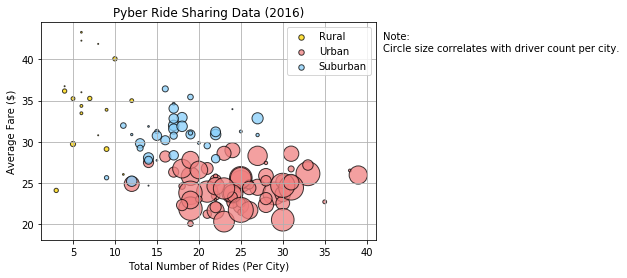

In [2]:
#Version 1
city_groupby = full_df.groupby('city')

x_list = city_groupby['ride_id'].count()
y_list = city_groupby['fare'].mean()
z_list = city_groupby['driver_count'].mean()

city_type = city_data_to_load.set_index('city')['type']

city_info_df = pd.DataFrame({"Number of Rides": x_list, 
                            "Average Fare": y_list, 
                            "Number of Drivers": z_list,
                            "Type of City": city_type
                            })

#also used with the pie charts
city_colors = {'Rural': 'Gold', 
            'Urban': 'LightCoral', 
            'Suburban': 'LightSkyBlue'
              }


##Version 1 & 2 Similarities end here


rural_df = city_info_df[city_info_df['Type of City'] == 'Rural']
urban_df = city_info_df[city_info_df['Type of City'] == 'Urban']
suburban_df = city_info_df[city_info_df['Type of City'] == 'Suburban']

plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], s = rural_df['Number of Drivers']**1.5, c = city_colors['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], s = urban_df['Number of Drivers']**1.5, c = city_colors['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], s = suburban_df['Number of Drivers']**1.5, c = city_colors['Suburban'],  edgecolor = 'black', label = 'Suburban', alpha = .75)

plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.text(42, 41,'Note: \nCircle size correlates with driver count per city.')

lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.savefig("pyber_bubble1.png", bbox_inches = "tight")
plt.show()

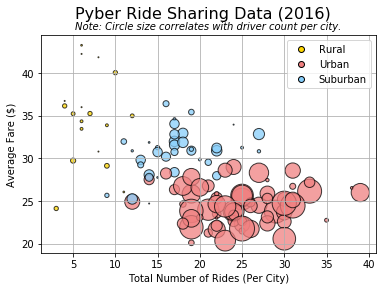

In [3]:
#Version 2
#still utilizing city_info_df from above

#appending color to the new city_info_df dataframe via a function
def city_color_col(lst):
    cols=[]
    for city in lst:
        if city == 'Rural':
            cols.append('gold')
        elif city == 'Urban':
            cols.append('lightcoral')
        else:
            cols.append('lightskyblue')
    return cols

c_type = city_info_df['Type of City']
cols = city_color_col(c_type)
city_info_df['Color'] = cols


#getting legend values from a dictionary
#plot a single point 2d line off map and use their legend

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='', markeredgecolor='black') for color in city_colors.values()]

plt.legend(markers, city_colors.keys())

#plotting utilizing new Color column
plt.scatter(x = x_list, y = y_list, c = city_info_df['Color'], s = z_list**1.5, edgecolor = 'black', alpha = .75)


#a different method of adding a note
plt.grid()
plt.suptitle("Pyber Ride Sharing Data (2016)", fontsize=16)
plt.title("Note: Circle size correlates with driver count per city.", fontsize=10, style='italic')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.savefig("pyber_bubble2.png", bbox_inches = "tight")
plt.show()

## Total Fares by City Type

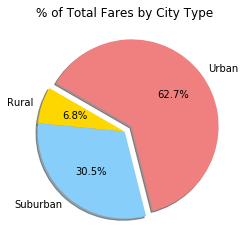

In [4]:
type_groupby = full_df.groupby('type')
fares_type = type_groupby.sum()['fare']
labels = fares_type.index
colors = [city_colors[i] for i in labels]
explode = [0 , 0, .1]

plt.pie(fares_type, explode=explode, labels=labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

plt.savefig("pyber_pie_fares.png", bbox_inches = "tight")
plt.show()

## Total Rides by City Type

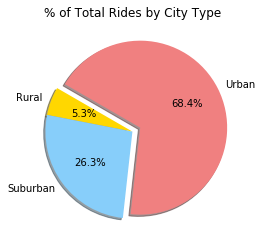

In [5]:
rides_type = type_groupby.count()['fare']

plt.pie(rides_type, explode=explode, labels=labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

plt.savefig("pyber_pie_rides.png", bbox_inches = "tight")
plt.show()

## Total Drivers by City Type

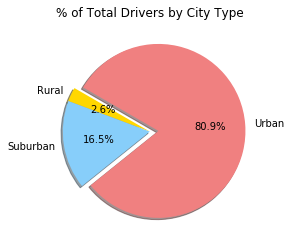

In [6]:
drivers_type = city_data_to_load.groupby('type').sum()['driver_count']

plt.pie(drivers_type, explode=explode, labels=labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")

plt.savefig("pyber_pie_drivers.png", bbox_inches = "tight")
plt.show()